<a href="https://colab.research.google.com/github/LarryLiebovitch/AI_AC4a_Fall2023/blob/main/Neural_Networks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install tensorflow numpy scikit-learn matplotlib

In [ ]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, Conv1D, Flatten, Dropout, MaxPooling1D
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from google.colab import drive

In [ ]:
drive.mount('/content/drive')
folder_path = '/content/drive/My Drive/PeaceProject-NN'
print(os.listdir(folder_path))

model_path = folder_path + '/models/'
if not os.path.exists(model_path):
  os.makedirs(model_path)

Mounted at /content/drive
['NOWlabels.npy', 'NOWembeddings.npy', 'youtube_embeddings.npy', 'youtube_metadatas.npy', 'sampled_metadatas.npy', 'sampled_embeddings.npy', 'models', 'NOW_metadatas.npy', 'NOW_embeddings.npy', 'largesampled_NOW_embeddings.npy', 'largesampled_NOW_metadatas.npy']


## Training

In [ ]:
# Load embeddings & labels
X = np.load(folder_path + '/largesampled_NOW_embeddings.npy', allow_pickle=True)
metadata = np.load(folder_path + '/largesampled_NOW_metadatas.npy', allow_pickle=True)
Y = np.array([entry['peaceful'] for entry in metadata])

print(f"Embeddings shape: {X.shape}")
print(f"Labels shape: {Y.shape}")

n_samples = X.shape[0]
input_dim = X.shape[1]

Embeddings shape: (104302, 1536)
Labels shape: (104302,)


In [ ]:
# 80% training data, 20% testing
X_train_ff, X_test_ff, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

X_train_cnn = X_train_ff[..., np.newaxis] # Shape: (num_training_samples, 1536, 1)
X_test_cnn = X_test_ff[..., np.newaxis] # Shape: (num_testing_samples, 1536, 1)

# Verify shapes
print(f"CNN X_train shape: {X_train_cnn.shape}")
print(f"CNN X_test shape: {X_test_cnn.shape}")
print(f"FF X_train shape: {X_train_ff.shape}")
print(f"FF X_test shape: {X_test_ff.shape}")
print(f"Y_train shape: {Y_train.shape}")
print(f"Y_test shape: {Y_test.shape}")

CNN X_train shape: (83441, 1536, 1)
CNN X_test shape: (20861, 1536, 1)
FF X_train shape: (83441, 1536)
FF X_test shape: (20861, 1536)
Y_train shape: (83441,)
Y_test shape: (20861,)


Parameters:

**CNN Network**
1. Convolutional Input Layer:
> *   Input shape: (1536, 1)
> *   Filters: 64
> *   Kernel Size: 3
> *   Output Shape: (input_dim - kernel_size + 1, filters) = (1536 - 3 + 1, 64) = (1534, 64)
> * Parameters:
>> * Weights: filters x kernel_size x input_channels = 64 x 3 x 1 = 192
>> * Biases: filters = 64
>> * Total Parameters: 192 + 64 = 256
2. Convolution Layer 2:
> *   Filters: 32
> *   Kernel Size: 3
> *   Output Shape: (input_dim - kernel_size + 1, filters) = (1534 - 3 + 1, 32) = (1532, 32)
> * Parameters:
>> * Weights: filters x kernel_size x input_channels = 32 x 3 x 64 = 6144
>> * Biases: filters = 32
>> * Total Parameters: 6144 + 32 = 6176
3. Flatten Layer:
> *   Converts output of Layer 2 into a 1D vector
> * Output Shape: 1532 x 32 = (49024)
4. Dense Layer 1:
> *   Units: 128
> *   Activation: ReLU
> * Parameters:
>> * Weights: input_units x output_units = 1532 x 128 = 49024  128 = 6275072
>> * Biases: output_units = 128
>> * Total Parameters: 6275072 + 128 = 6275200
5. Dense Layer 2:
> *   Units: 64
> *   Activation: ReLU
> * Parameters:
>> * Weights: input_units x output_units = 128 x 64 = 8192
>> * Biases: output_units = 64
>> * Total Parameters: 8192 + 64 = 8256
6. Output Layer:
> *   Units: 1
> *   Activation: Sigmoid
> * Parameters:
>> * Weights: input_units x output_units = 64 x 1 = 64
>> * Biases: output_units = 1
>> * Total Parameters: 64 + 1 = 65

**Fully-Connected Feed Forward Network**
1. Input Layer:
> *   Input shape: (1536)
2. Dense Layer 1:
> *   Units: 512
> *   Activation: ReLU
> * Dropout Rate: 30%
> * Parameters:
>> * Weights: input_units x output_units = 1536 x 512 = 786432
>> * Biases: output_units = 512
>> * Total Parameters: 786432 + 512 = 786944
3. Dense Layer 2:
> *   Units: 256
> *   Activation: ReLU
> * Dropout Rate: 30%
> * Parameters:
>> * Weights: input_units x output_units = x 512 x 256 = 131072
>> * Biases: output_units = 256
>> * Total Parameters: 131072 + 256 = 131328
4. Dense Layer 3:
> *   Units: 128
> *   Activation: ReLU
> * Dropout Rate: 30%
> * Parameters:
>> * Weights: input_units x output_units = 256 x 128 = 32768
>> * Biases: output_units = 128
>> * Total Parameters: 32768 + 128 = 32896
5. Dense Layer 4:
> *   Units: 64
> *   Activation: ReLU
> * Dropout Rate: 30%
> * Parameters:
>> * Weights: input_units x output_units = 128 x 64 = 8192
>> * Biases: output_units = 64
>> * Total Parameters: 8192 + 64 = 8256
6. Dense Output Layer:
> *   Units: 1
> *   Activation: Sigmoid
> * Parameters:
>> * Weights: input_units x output_units = 64 x 1 = 64
>> * Biases: output_units = 1
>> * Total Parameters: 64 + 1 = 65

**Revised CNN Network**
1. Convolutional Input Layer:
> *   Input shape: (1536, 1)
> *   Filters: 64
> *   Kernel Size: 3
> *   Output Shape: (input_dim - kernel_size + 1, filters) = (1536 - 3 + 1, 64) = (1534, 64)
> * Parameters:
>> * Weights: filters x kernel_size x input_channels = 64 x 3 x 1 = 192
>> * Biases: filters = 64
>> * Total Parameters: 192 + 64 = 256
2. Max Pooling Layer:
> *   Pool Size: 2
> *   Output Shape: (input_dim/pool_size, filters) = (1534/2, 64) = (767, 64)
3. Flatten Layer:
> *   Converts output of Layer 2 into a 1D vector
> *   Output Shape: 767 x 64 = (49088)
4. Dense Layer 1:
> *   Units: 128
> *   Activation: ReLU
> * Parameters:
>> * Weights: input_units x output_units = 49088 x 128 = 6283264
>> * Biases: output_units = 128
>> * Total Parameters: 6283264 + 128 = 6283392
5. Dense Layer 2:
> *   Units: 64
> *   Activation: ReLU
> * Parameters:
>> * Weights: input_units x output_units = 128 x 64 = 8192
>> * Biases: output_units = 64
>> * Total Parameters: 8192 + 64 = 8256
6. Dense Output Layer:
> *   Units: 1
> *   Activation: Sigmoid
> * Parameters:
>> * Weights: input_units x output_units = 64 x 1 = 64
>> * Biases: output_units = 1
>> * Total Parameters: 64 + 1 = 65








In [ ]:
cnn_model = Sequential([
  # Convolutional layer 1
  Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(input_dim, 1)),

  # Convolutional layer 2
  Conv1D(filters=32, kernel_size=3, activation='relu'),

  # Convert 2D to 1D
  Flatten(),

  # Fully-connected layer 1
  Dense(128, activation='relu'),
  Dropout(0.3), # Random dropout to prevent overfitting

  # Fully-connected layer 2
  Dense(64, activation='relu'),

  # Output layer
  Dense(1, activation='sigmoid') # Sigmoid to output probabilities
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
ff_model = Sequential([
  Dense(512, activation='relu', input_shape=(input_dim,)),
  Dropout(0.3),

  Dense(256, activation='relu'),
  Dropout(0.3),

  Dense(128, activation='relu'),
  Dropout(0.3),

  Dense(64, activation='relu'),
  Dropout(0.3),

  # Output layer
  Dense(1, activation='sigmoid') # Sigmoid to output probabilities
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
new_cnn_model = Sequential([
  # Convolutional layer 1
  Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(input_dim, 1)),

  # Max Pooling layer
  MaxPooling1D(pool_size=2),

  # Convert 2D to 1D
  Flatten(),

  # Fully-connected layer 1
  Dense(128, activation='relu'),

  # Fully-connected layer 2
  Dense(64, activation='relu'),

  # Output layer
  Dense(1, activation='sigmoid') # Sigmoid to output probabilities
])

Backpropagation:
>* Optimizer: Adam
>* Loss Function: Binary Cross-Entropy

In [ ]:
# Define loss function & optimizer
cnn_model.compile(optimizer=Adam(learning_rate=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [ ]:
ff_model.compile(optimizer=Adam(learning_rate=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [ ]:
new_cnn_model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

Training:
>* Epochs: 10
>* Batch Size: 32

In [ ]:
# Train
cnn_history = cnn_model.fit(X_train_cnn, Y_train,
                          epochs=10,
                          batch_size=32,
                          verbose=1)

Epoch 1/10
2608/2608 ━━━━━━━━━━━━━━━━━━━━ 27s 8ms/step - accuracy: 0.9390 - loss: 0.1582
Epoch 2/10
2608/2608 ━━━━━━━━━━━━━━━━━━━━ 35s 7ms/step - accuracy: 0.9731 - loss: 0.0799
Epoch 3/10
2608/2608 ━━━━━━━━━━━━━━━━━━━━ 21s 7ms/step - accuracy: 0.9786 - loss: 0.0630
Epoch 4/10
2608/2608 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.9847 - loss: 0.0425
Epoch 5/10
2608/2608 ━━━━━━━━━━━━━━━━━━━━ 21s 7ms/step - accuracy: 0.9893 - loss: 0.0306
Epoch 6/10
2608/2608 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.9924 - loss: 0.0214
Epoch 7/10
2608/2608 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - accuracy: 0.9937 - loss: 0.0175
Epoch 8/10
2608/2608 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - accuracy: 0.9948 - loss: 0.0142
Epoch 9/10
2608/2608 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.9958 - loss: 0.0126
Epoch 10/10
2608/2608 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - accuracy: 0.9962 - loss: 0.0107


In [ ]:
ff_history = ff_model.fit(X_train_ff, Y_train,
                          epochs=10,
                          batch_size=32,
                          verbose=1)

Epoch 1/10
2608/2608 ━━━━━━━━━━━━━━━━━━━━ 16s 4ms/step - accuracy: 0.9445 - loss: 0.1518
Epoch 2/10
2608/2608 ━━━━━━━━━━━━━━━━━━━━ 12s 2ms/step - accuracy: 0.9724 - loss: 0.0825
Epoch 3/10
2608/2608 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.9788 - loss: 0.0675
Epoch 4/10
2608/2608 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.9812 - loss: 0.0578
Epoch 5/10
2608/2608 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.9828 - loss: 0.0510
Epoch 6/10
2608/2608 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.9849 - loss: 0.0439
Epoch 7/10
2608/2608 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9881 - loss: 0.0365
Epoch 8/10
2608/2608 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.9900 - loss: 0.0293
Epoch 9/10
2608/2608 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.9911 - loss: 0.0251
Epoch 10/10
2608/2608 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.9919 - loss: 0.0220


In [ ]:
new_cnn_history = new_cnn_model.fit(X_train_cnn, Y_train,
                          epochs=10,
                          batch_size=32,
                          verbose=1)

Epoch 1/10
2608/2608 ━━━━━━━━━━━━━━━━━━━━ 21s 7ms/step - accuracy: 0.9427 - loss: 0.1598
Epoch 2/10
2608/2608 ━━━━━━━━━━━━━━━━━━━━ 18s 7ms/step - accuracy: 0.9696 - loss: 0.0886
Epoch 3/10
2608/2608 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.9733 - loss: 0.0761
Epoch 4/10
2608/2608 ━━━━━━━━━━━━━━━━━━━━ 18s 7ms/step - accuracy: 0.9788 - loss: 0.0604
Epoch 5/10
2608/2608 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.9833 - loss: 0.0444
Epoch 6/10
2608/2608 ━━━━━━━━━━━━━━━━━━━━ 21s 7ms/step - accuracy: 0.9866 - loss: 0.0333
Epoch 7/10
2608/2608 ━━━━━━━━━━━━━━━━━━━━ 18s 7ms/step - accuracy: 0.9910 - loss: 0.0235
Epoch 8/10
2608/2608 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.9941 - loss: 0.0163
Epoch 9/10
2608/2608 ━━━━━━━━━━━━━━━━━━━━ 18s 7ms/step - accuracy: 0.9956 - loss: 0.0121
Epoch 10/10
2608/2608 ━━━━━━━━━━━━━━━━━━━━ 18s 7ms/step - accuracy: 0.9967 - loss: 0.0094


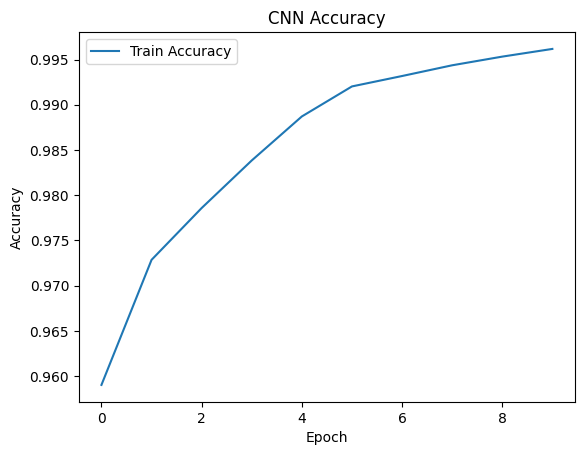

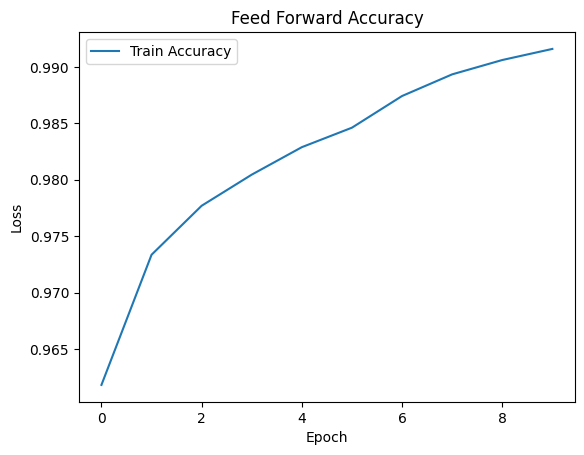

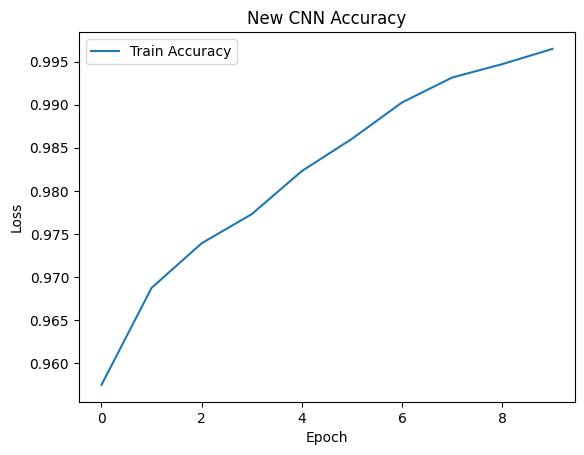

In [ ]:
# Plot training & validation accuracy
plt.plot(cnn_history.history['accuracy'], label='Train Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('CNN Accuracy')
plt.show()

# Plot training & validation accuracy
plt.plot(ff_history.history['accuracy'], label='Train Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Feed Forward Accuracy')
plt.show()

# Plot training & validation accuracy
plt.plot(new_cnn_history.history['accuracy'], label='Train Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('New CNN Accuracy')
plt.show()

In [ ]:
# Save models to Drive
cnn_model.save(os.path.join(model_path, 'cnn_model.keras'))
ff_model.save(os.path.join(model_path, 'ff_model.keras'))
new_cnn_model.save(os.path.join(model_path, 'new_cnn_model.keras'))

## Test Set

In [ ]:
# Load models
cnn_model = load_model(os.path.join(model_path, 'cnn_model.keras'))
ff_model = load_model(os.path.join(model_path, 'ff_model.keras'))
new_cnn_model = load_model(os.path.join(model_path, 'new_cnn_model.keras'))

Threshold: 0.5

In [ ]:
# Apply to test set
y_pred_prob = cnn_model.predict(X_test_cnn)
y_pred = (y_pred_prob > 0.5).astype(int) # Threshold: 0.5

accuracy = accuracy_score(Y_test, y_pred)
print(f"Test Accuracy: {accuracy:.4f}")

652/652 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step
Test Accuracy: 0.9724


In [ ]:
test_loss, test_acc = ff_model.evaluate(X_test_ff, Y_test)
print(f'Test accuracy: {test_acc:.4f}')

652/652 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9772 - loss: 0.1076
Test accuracy: 0.9748


In [ ]:
new_y_pred_prob = new_cnn_model.predict(X_test_cnn)
new_y_pred = (new_y_pred_prob > 0.5).astype(int) # Threshold: 0.5

new_accuracy = accuracy_score(Y_test, new_y_pred)
print(f"Test Accuracy: {new_accuracy:.4f}")

652/652 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Test Accuracy: 0.9699


## YouTube

In [ ]:
# Load models
cnn_model = load_model(os.path.join(model_path, 'cnn_model.keras'))
ff_model = load_model(os.path.join(model_path, 'ff_model.keras'))
new_cnn_model = load_model(os.path.join(model_path, 'new_cnn_model.keras'))

In [ ]:
youtube_embeddings = np.load(folder_path + '/youtube_embeddings.npy', allow_pickle=True) # Shape: (22, 1536)
youtube_metadata = np.load(folder_path + '/youtube_metadatas.npy', allow_pickle=True) # Shape: (22,)

print(f"Embeddings shape: {youtube_embeddings.shape}")
print(f"Labels shape: {youtube_metadata.shape}")

Embeddings shape: (22, 1536)
Labels shape: (22,)


In [ ]:
# Group by source
src_groups = {}
for i, entry in enumerate(youtube_metadata):
  src = entry['source']
  if src not in src_groups:
    src_groups[src] = {'embeddings': [], 'filenames': []}
  src_groups[src]['embeddings'].append(youtube_embeddings[i])
  src_groups[src]['filenames'].append(entry['filename'])

# Convert lists to numpy arrays
for src, data in src_groups.items():
  src_groups[src]['embeddings'] = np.array(data['embeddings'])
  src_groups[src]['filenames'] = np.array(data['filenames'])

In [ ]:
cnn_src_results = {}
ff_src_results = {}
new_cnn_src_results = {}
for src, data in src_groups.items():
  embeddings = data['embeddings']
  embeddings_cnn = embeddings[..., np.newaxis] # Expand shape
  filenames = data['filenames']

  # Predict probabilities
  cnn_pred_prob = cnn_model.predict(embeddings_cnn)
  ff_pred_prob = ff_model.predict(embeddings)
  new_cnn_pred_prob = new_cnn_model.predict(embeddings_cnn)

  # Store results
  cnn_src_results[src] = {
    'src': src,
    'predictions': cnn_pred_prob,
    'filenames': filenames,
  }
  ff_src_results[src] = {
    'src': src,
    'predictions': ff_pred_prob,
    'filenames': filenames,
  }
  new_cnn_src_results[src] = {
    'src': src,
    'predictions': new_cnn_pred_prob,
    'filenames': filenames,
  }

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 772ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 546ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 400ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 548ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 421ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 623ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 675ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 432ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 539ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


In [ ]:
for src in cnn_src_results.keys():
  cnn_predictions = cnn_src_results[src]['predictions']
  ff_predictions = ff_src_results[src]['predictions']
  new_cnn_predictions = new_cnn_src_results[src]['predictions']
  filenames = cnn_src_results[src]['filenames']

  print(f"Source: {src}")
  for filename, cnn_pred, ff_pred, new_cnn_pred in zip(filenames, cnn_predictions, ff_predictions, new_cnn_predictions):
    print(f"  Filename: {filename}")
    if cnn_pred[0] > 0.5:
      print(f"  CNN Peace Prediction: {cnn_pred[0]:.4f}, True")
    else:
      print(f"  CNN Peace Prediction: {cnn_pred[0]:.4f}, False")
    if ff_pred[0] > 0.5:
      print(f"  FF Peace Prediction: {ff_pred[0]:.4f}, True")
    else:
      print(f"  FF Peace Prediction: {ff_pred[0]:.4f}, False")
    if new_cnn_pred[0] > 0.5:
      print(f"  New CNN Peace Prediction: {new_cnn_pred[0]:.4f}, True")
    else:
      print(f"  New CNN Peace Prediction: {new_cnn_pred[0]:.4f}, False")
    print()

Source: nyt
  Filename: _tO9ZPTDk5o.txt
  CNN Peace Prediction: 1.0000, True
  FF Peace Prediction: 1.0000, True
  New CNN Peace Prediction: 1.0000, True

  Filename: QXw52ETHd28.txt
  CNN Peace Prediction: 1.0000, True
  FF Peace Prediction: 1.0000, True
  New CNN Peace Prediction: 1.0000, True

  Filename: dUyM-vaV0eE.txt
  CNN Peace Prediction: 1.0000, True
  FF Peace Prediction: 1.0000, True
  New CNN Peace Prediction: 1.0000, True

  Filename: HyzGkEV3p2g.txt
  CNN Peace Prediction: 1.0000, True
  FF Peace Prediction: 1.0000, True
  New CNN Peace Prediction: 0.9992, True

  Filename: ocwRXjhyU1M.txt
  CNN Peace Prediction: 1.0000, True
  FF Peace Prediction: 1.0000, True
  New CNN Peace Prediction: 1.0000, True

Source: cnn
  Filename: KMVSP2iYxQU.txt
  CNN Peace Prediction: 1.0000, True
  FF Peace Prediction: 1.0000, True
  New CNN Peace Prediction: 1.0000, True

  Filename: z_7QF-cJ1sY.txt
  CNN Peace Prediction: 1.0000, True
  FF Peace Prediction: 1.0000, True
  New CNN Peace P

## Capstone

In [ ]:
# Load models
cnn_model = load_model(os.path.join(model_path, 'cnn_model.keras'))
ff_model = load_model(os.path.join(model_path, 'ff_model.keras'))
new_cnn_model = load_model(os.path.join(model_path, 'new_cnn_model.keras'))

In [ ]:
capstone_embeddings = np.load(folder_path + '/sampled_embeddings.npy', allow_pickle=True) # Shape: (3200, 1536)
capstone_metadata = np.load(folder_path + '/sampled_metadatas.npy', allow_pickle=True) # Shape: (3200,)

print(f"Embeddings shape: {capstone_embeddings.shape}")
print(f"Labels shape: {capstone_metadata.shape}")

Embeddings shape: (3200, 1536)
Labels shape: (3200,)


In [ ]:
# Group by country
country_groups = {}
for i, entry in enumerate(capstone_metadata):
  country = entry['country']
  if country not in country_groups:
    country_groups[country] = {'embeddings': [], 'labels': []}
  country_groups[country]['embeddings'].append(capstone_embeddings[i])
  country_groups[country]['labels'].append(entry['peace'])

# Convert lists to numpy arrays
for country, data in country_groups.items():
  country_groups[country]['embeddings'] = np.array(data['embeddings'])
  country_groups[country]['labels'] = np.array(data['labels'])

In [ ]:
# Test each country
cnn_country_results = {}
ff_country_results = {}
new_cnn_country_results = {}
for country, data in country_groups.items():
  embeddings = data['embeddings']
  embeddings_cnn = embeddings[..., np.newaxis] # Expand shape
  labels = data['labels']

  # Predict probabilities w/ CNN
  cnn_pred_prob = cnn_model.predict(embeddings_cnn)
  cnn_avg_pred = np.mean(cnn_pred_prob)

  # Predict probabilities w/ FF
  ff_pred_prob = ff_model.predict(embeddings)
  ff_avg_pred = np.mean(ff_pred_prob)

  # Predict probabilities w/ New CNN
  new_cnn_pred_prob = new_cnn_model.predict(embeddings_cnn)
  new_cnn_avg_pred = np.mean(new_cnn_pred_prob)

  # Classify country as peaceful or not
  cnn_country_peace = cnn_avg_pred > 0.5
  ff_country_peace = ff_avg_pred > 0.5
  new_cnn_country_peace = new_cnn_avg_pred > 0.5

  # Count peaceful classifications
  num_cnn_peaceful = np.sum((cnn_pred_prob > 0.5).astype(int))
  num_ff_peaceful = np.sum((ff_pred_prob > 0.5).astype(int))
  num_new_cnn_peaceful = np.sum((new_cnn_pred_prob > 0.5).astype(int))

  # Count peaceful true labels
  num_true_peaceful = np.sum(labels)

  # Store results
  cnn_country_results[country] = {
    'avg_prediction': cnn_avg_pred,
    'peaceful': cnn_country_peace,
    'true_labels': labels,
    'num_peaceful_preds': num_cnn_peaceful,
    'true_peaceful_count': num_true_peaceful
  }
  ff_country_results[country] = {
    'avg_prediction': ff_avg_pred,
    'peaceful': ff_country_peace,
    'true_labels': labels,
    'num_peaceful_preds': num_ff_peaceful,
    'true_peaceful_count': num_true_peaceful
  }
  new_cnn_country_results[country] = {
    'avg_prediction': new_cnn_avg_pred,
    'peaceful': new_cnn_country_peace,
    'true_labels': labels,
    'num_peaceful_preds': num_new_cnn_peaceful,
    'true_peaceful_count': num_true_peaceful
  }

7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 100ms/step
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 49ms/step
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
7/7 ━━━━━━━

In [ ]:
for country in cnn_country_results.keys():
  cnn_result = cnn_country_results[country]
  ff_result = ff_country_results[country]
  new_cnn_result = new_cnn_country_results[country]
  print(f"Country: {country}")
  print(f"CNN:")
  print(f"  Avg Prediction: {cnn_result['avg_prediction']:.4f}")
  print(f"  Peaceful ratio: {np.sum(cnn_result['num_peaceful_preds'])} / {len(cnn_result['true_labels'])}")
  print(f"  Peace Prediction: {cnn_result['peaceful']}")
  print(f"Feed Forward:")
  print(f"  Avg Prediction: {ff_result['avg_prediction']:.4f}")
  print(f"  Peaceful ratio: {np.sum(ff_result['num_peaceful_preds'])} / {len(cnn_result['true_labels'])}")
  print(f"  Peace Prediction: {ff_result['peaceful']}")
  print(f"New CNN:")
  print(f"  Avg Prediction: {new_cnn_result['avg_prediction']:.4f}")
  print(f"  Peaceful ratio: {np.sum(new_cnn_result['num_peaceful_preds'])} / {len(cnn_result['true_labels'])}")
  print(f"  Peace Prediction: {new_cnn_result['peaceful']}")
  if np.sum(cnn_result['true_peaceful_count']) > (len(cnn_result['true_labels']) / 2):
    print(f"True Peace Label: True")
  else:
    print(f"True Peace Label: False")
  print()

Country: Australia
CNN:
  Avg Prediction: 0.7921
  Peaceful ratio: 164 / 200
  Peace Prediction: True
Feed Forward:
  Avg Prediction: 0.7871
  Peaceful ratio: 158 / 200
  Peace Prediction: True
New CNN:
  Avg Prediction: 0.7469
  Peaceful ratio: 149 / 200
  Peace Prediction: True
True Peace Label: True

Country: Canada
CNN:
  Avg Prediction: 0.8825
  Peaceful ratio: 179 / 200
  Peace Prediction: True
Feed Forward:
  Avg Prediction: 0.8462
  Peaceful ratio: 168 / 200
  Peace Prediction: True
New CNN:
  Avg Prediction: 0.7756
  Peaceful ratio: 157 / 200
  Peace Prediction: True
True Peace Label: True

Country: Finland
CNN:
  Avg Prediction: 0.6187
  Peaceful ratio: 126 / 200
  Peace Prediction: True
Feed Forward:
  Avg Prediction: 0.5603
  Peaceful ratio: 109 / 200
  Peace Prediction: True
New CNN:
  Avg Prediction: 0.5166
  Peaceful ratio: 104 / 200
  Peace Prediction: True
True Peace Label: True

Country: France
CNN:
  Avg Prediction: 0.7128
  Peaceful ratio: 144 / 200
  Peace Predicti

### Threshold: 0.5
CNN Accuracy: 16/16 = 1.00

Feed Forward: 16/16 = 1.00

New CNN Accuracy: 16/16 = 1.00